In [7]:
import pandas as pd
from glob import glob

files = glob('*.csv', root_dir="groups")

df = pd.DataFrame()
for file in files:
    sto = pd.read_csv('groups/' + file, sep=',')
    sto['group'] = file.split('.')[0]
    df = pd.concat([sto, df])

In [9]:
mask = df['upper level'].isna() & (df['course code'].str.extract('(\d+)')[0].astype(int) >= 300)
df.loc[mask, 'upper level'] = True
df = df.fillna(False)
df.drop(columns=['Unnamed: 3'])

/var/folders/f9/38nkw6517lgf362dv55hy0xc0000gn/T/ipykernel_49675/1886047866.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,course code,course name,credits,upper level,group
0,AFRA 308,African American History in Delaware,3,True,coe
1,AFRA 330,Rhetoric of Black America,3,True,coe
2,AFRA 443,Seminar in Africa Under Colonial Rule,3,True,coe
3,ANTH 343,Motherhood and Contested Reproduction,3,True,coe
4,ANTH 354,Global Humanitarianism,3,True,coe
...,...,...,...,...,...
328,WOMS 291,Women’s History Through Film,1,False,groupb
329,WOMS 313,Theory and Methods in Feminism,3,True,groupb
330,WOMS 314,Social Media: Feminist Activism,3,True,groupb
331,WOMS 324,Feminism and Sexualities,3,True,groupb


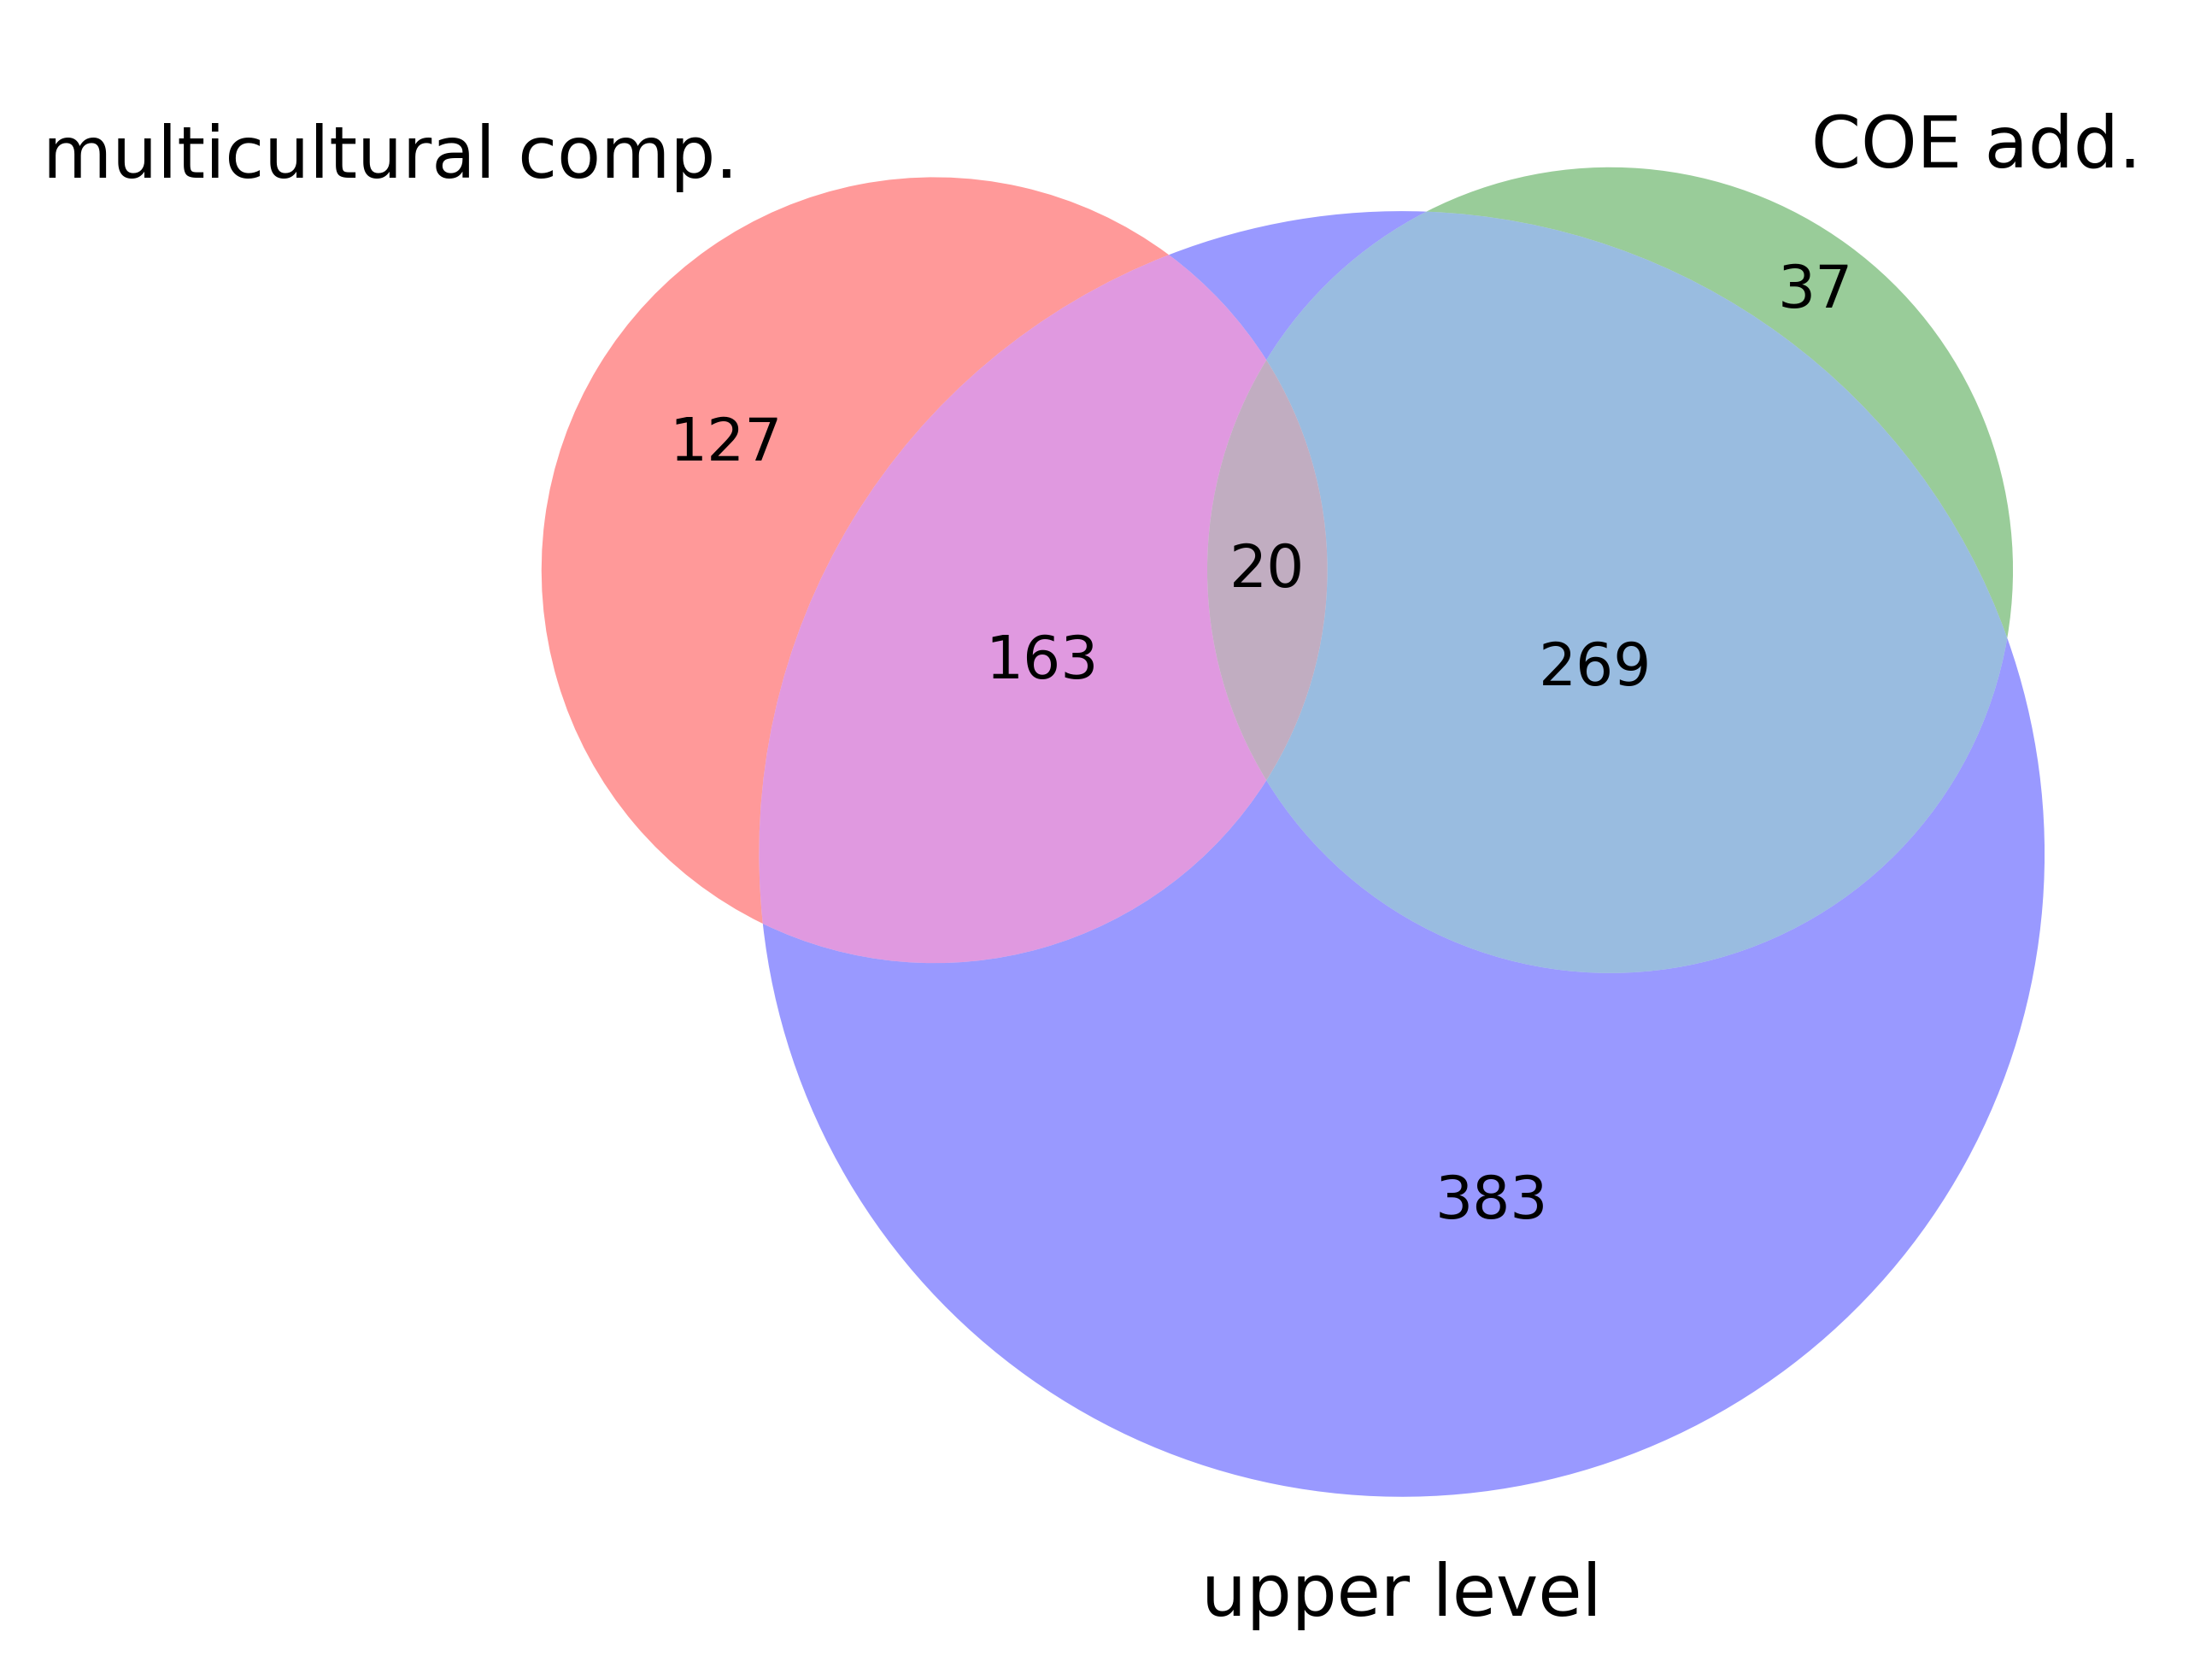

In [32]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

set_upper = set(df[df["upper level"]]["course code"])
set_multicultural = set(df[df['group'] == 'multicultural']['course code'])
set_coe = set(df[df['group'] == 'coe']['course code'])
set_a = set(df[df['group'] == 'groupa']['course code'])
set_b = set(df[df['group'] == 'groupb']['course code'])
set_c = set(df[df['group'] == 'groupc']['course code'])
set_pcp = set(df[df['group'] == 'pcp']['course code'])

fig,ax = plt.subplots(dpi=500)
venn3([set_multicultural, set_coe, set_upper], set_labels=['multicultural comp.', 'COE add.', 'upper level'])

In [47]:
intersection = set_multicultural & set_coe & set_upper
intersection

{'AFRA 443',
 'ANTH 343',
 'ANTH 354',
 'CHIN 451',
 'CHIN 452',
 'ECON 418',
 'FREN 457',
 'FREN 458',
 'HIST 439',
 'HIST 444',
 'HIST 477',
 'JAPN 208',
 'RUSS 325',
 'SPAN 447',
 'SPAN 471',
 'SPAN 472',
 'SPAN 473',
 'SPAN 474',
 'SPAN 479',
 'SPAN 491'}

In [93]:
def get_numbers(set):
    print(len(set - set_multicultural - set_upper - set_pcp))
    print(len(set & set_multicultural - set_upper - set_pcp))
    print(len(set & set_multicultural & set_upper))
    print(len(set & set_upper - set_multicultural))

get_numbers(set_coe)

37
2
20
269


(<Figure size 1248x1248 with 1 Axes>, <Axes: >)

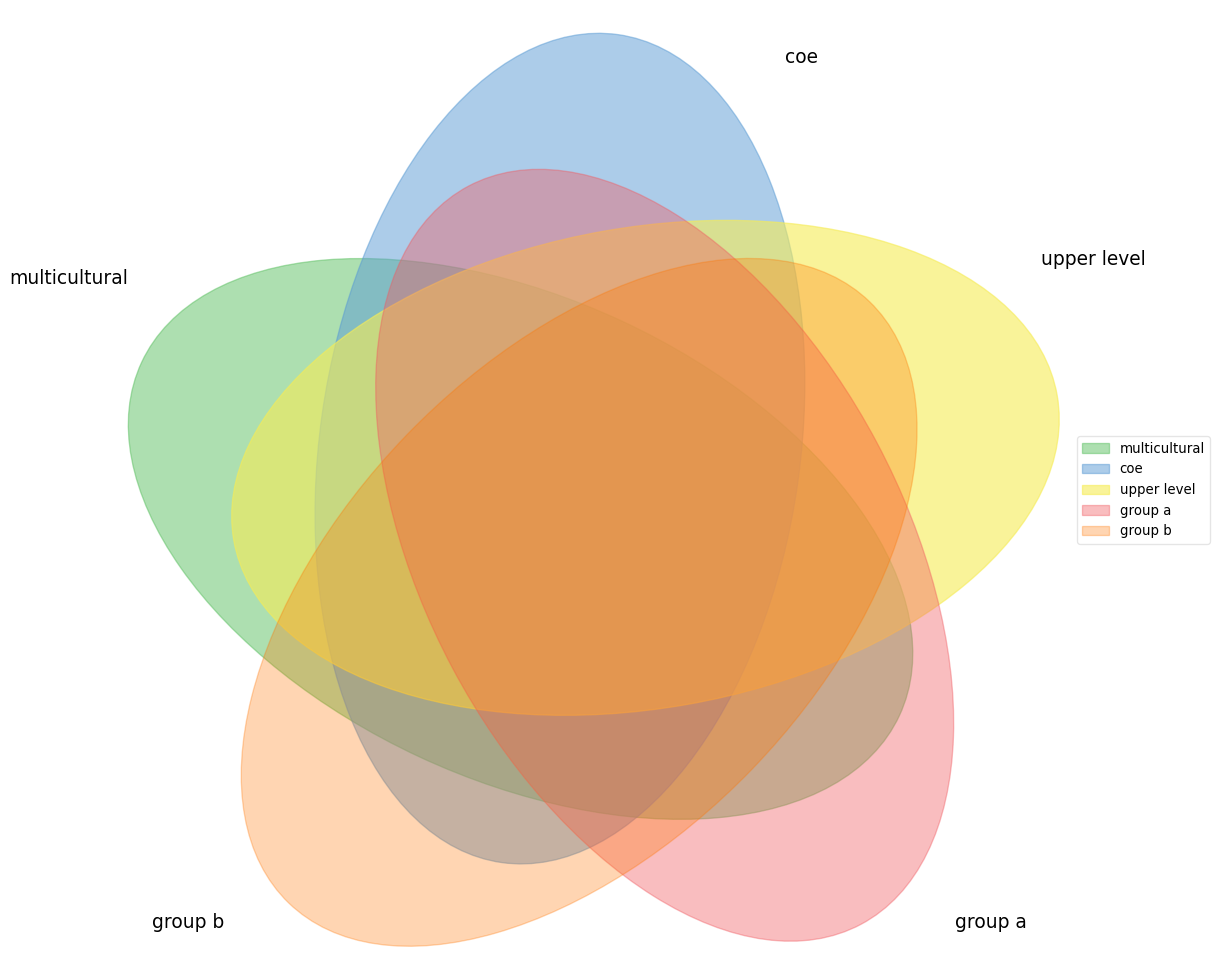

In [74]:
import venn

labels = venn.get_labels([{'multicultural': set_multicultural, 
            'upper level': set_upper, 
            'group a': set_a, 
            'group b': set_b, 
            'group c': set_c}], fill=['number', 'logic'])
venn.venn5(labels, 
            names=['multicultural','coe','upper level','group a','group b','group c'])

now assembling a data file that may be shared

In [ ]:
df['multicultural'] = df['course code'].isin(set_multicultural)


,course code,course name,credits,upper level,group,Unnamed: 3,multicultural
0,AFRA 308,African American History in Delaware,3,True,coe,False,False
1,AFRA 330,Rhetoric of Black America,3,True,coe,False,False
2,AFRA 443,Seminar in Africa Under Colonial Rule,3,True,coe,False,True
3,ANTH 343,Motherhood and Contested Reproduction,3,True,coe,False,True
4,ANTH 354,Global Humanitarianism,3,True,coe,False,True
...,...,...,...,...,...,...,...
328,WOMS 291,Women’s History Through Film,1,False,groupb,False,False
329,WOMS 313,Theory and Methods in Feminism,3,True,groupb,False,False
330,WOMS 314,Social Media: Feminist Activism,3,True,groupb,False,True
331,WOMS 324,Feminism and Sexualities,3,True,groupb,False,False


In [10]:
res = 0
for n in range(100):
    res +=  n*((2/9) ** n)

In [14]:
res * 2

0.7346938775510201